# Random Forest Classification

## Content
- Processing Data
- RandomForestClassification: iteration1
- RandomForestClassification: other iterations
- Hyperparameter tuning
- Feature relevance


### Comments

- In a first iteration I used `test_size=0.3`, `n_estimators=30` and `max_depth=3`.

- in other iterations, I made RandomForestClassifiers(rfc) using the parameters in the parethesis and found these scores.

- The metrics Accuracy.F1score, recall and precision are found.

- The tuning the hyperparameters of the classifier with best performance shown the highest F1score and Recall.

- The order of importance among the columns found  was `distance`, `n_views`, `n_likes`, `item_available_timer`, `item_category`, `item_condition`, in descending order.

### Suggestions for metrics and methods to use further.
- Check the metrics Cross-validation and AUC-ROC
- Use also gridsearch to improve the metrics [source](https://www.mygreatlearning.com/blog/gridsearchcv/)
- Compare alternative models using Pycaret


### Definitions

Precision: measures the proportion of true positives among all positives. A high precision score indicates that the model is good at correctly predicting positive cases and minimizing false positives.

Recall (True positive rate): measures the proportion of true positives among all actual positive cases in the dataset. A high recall score indicates that the model is good at identifying all positive cases and minimizing false negatives.

**Q1. Comment on precision vs recall.**
A. Precision is a metric that measures the accuracy of positive predictions. It is the number of true positive predictions divided by the number of true positive predictions plus false positive predictions.

Recall, on the other hand, measures the completeness of positive predictions. It is the number of true positive predictions divided by the number of true positive predictions plus false negative predictions.

**Q2. What is the difference between precision and accuracy?**
A. Accuracy is the fraction of correct predictions made by a classifier over all the instances in the test set. On the other hand, precision is a metric that measures the accuracy of positive predictions.




max_depth: 3,5,7 (or 9)
max_features(default)

TODO:
- Format columns as Felipe did: 
```timedate_creation": "2023-03-29T17:33:41.468400+02:00",         "item_age": "0 days, 0 hours, 32 minutes"``   

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
# import graphviz

from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.metrics import f1_score

from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [40]:
data= pd.read_csv('data/ml_class_df.csv',index_col=None)
item_data = data
item_data.head()

,item_category,item_condition,item_postcode,item_available_timer,distance,n_views,n_likes,item_available,item_id
0,other,good,10781,64,7001,1460,116,1,1
1,kitchen_utensils,good,14053,18,1668,1399,69,0,2
2,kitchen_utensils,poor,13189,24,1396,441,8,0,3
3,kitchen_utensils,good,12437,30,28835,1162,220,0,4
4,kids,like_new,13591,53,11339,1652,115,1,5


#### Features:

- item_category
- item_condition
- item_postcode
- item_available_timer in hours
- distance (item-user in meters)
- n_views
- n_likes
- item_available = y -> if the item is still available (this is what we’re trying to predict)

In [41]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_category         5000 non-null   object
 1   item_condition        5000 non-null   object
 2   item_postcode         5000 non-null   int64 
 3   item_available_timer  5000 non-null   int64 
 4   distance              5000 non-null   int64 
 5   n_views               5000 non-null   int64 
 6   n_likes               5000 non-null   int64 
 7   item_available        5000 non-null   int64 
 8   item_id               5000 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 351.7+ KB


In [42]:
categorical_vars = [ 'item_category', 'item_condition', 'item_postcode', 'item_available']

## Preprocessing Data

In [43]:
# item_data['item_postcode'] = pd.to_numeric(item_data['item_postcode'])
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_category         5000 non-null   object
 1   item_condition        5000 non-null   object
 2   item_postcode         5000 non-null   int64 
 3   item_available_timer  5000 non-null   int64 
 4   distance              5000 non-null   int64 
 5   n_views               5000 non-null   int64 
 6   n_likes               5000 non-null   int64 
 7   item_available        5000 non-null   int64 
 8   item_id               5000 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 351.7+ KB


In [44]:
print(pd.unique(item_data['item_postcode']))
print(len(pd.unique(item_data['item_postcode'])))

[10781 14053 13189 12437 13591 12101 10623 12587 13583 10243 10707 10715
 12359 10249 12043 10589 13585 12557 10555 10789 13089 12207 13505 10318
 12107 13465 13125 12099 12627 12307 13187 10829 10365 14129 13437 10557
 12055 14052 13503 14195 12555 12277 10405 13055 13597 12589 10823 12169
 10783 13158 12524 12681 12309 13088 12347 12353 12351 10551 14169 10437
 14055 12621 13469 14050 12105 12249 13405 13509 13349 13359 13159 12109
 13507 10825 12053 12679 13627 10967 12305 14057 10777 12247 12355 13589
 10315 14109 12683 14165 12159 10963 13439 10245 12165 13127 12167 13467
 13435 12209 12487 12687 12049 13129 10961 12279 10179 10178 12205 12163
 10827 10367 13353 12623 10553 13593 10319 12439 10779 12051 12161 10719
 12203 14059 12357 12685 12047 10627 14193 10997 12103 13351 10559 10999
 10369 12435 10709 12526 14163 13156 13357 10711 10717 14167 14199 10587
 13409 12349 12045 10119 10439 12059 12619 12629 10247 10969 13595 10317
 13051 14089 12057 13587 13403 13599 13086 12527 12

In [45]:
# I am going to drop postcodes because it has too many unique items
item_data = item_data.drop('item_postcode', axis=1)
item_data.head()

,item_category,item_condition,item_available_timer,distance,n_views,n_likes,item_available,item_id
0,other,good,64,7001,1460,116,1,1
1,kitchen_utensils,good,18,1668,1399,69,0,2
2,kitchen_utensils,poor,24,1396,441,8,0,3
3,kitchen_utensils,good,30,28835,1162,220,0,4
4,kids,like_new,53,11339,1652,115,1,5


In [46]:
item_data.columns

Index(['item_category', 'item_condition', 'item_available_timer', 'distance',
       'n_views', 'n_likes', 'item_available', 'item_id'],
      dtype='object')

In [47]:
item_data['item_available'].unique()

array([1, 0])

In [48]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   item_category         5000 non-null   object
 1   item_condition        5000 non-null   object
 2   item_available_timer  5000 non-null   int64 
 3   distance              5000 non-null   int64 
 4   n_views               5000 non-null   int64 
 5   n_likes               5000 non-null   int64 
 6   item_available        5000 non-null   int64 
 7   item_id               5000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 312.6+ KB


### Encoding

In [49]:
# item_category = ['furniture',  'clothes',  'kitchen_utensils', 'kids', 'other'] 
# item_condition = ['poor', 'acceptable', 'good', 'like_new']
# item_available = ['yes', 'no']

In [50]:
# encoding

item_data['item_available'] = item_data['item_available'].replace('no', 0).replace('yes', 1)
item_data['item_category'] = item_data['item_category'].replace('furniture', 1).replace('clothes', 2).replace('kitchen_utensils', 3).replace('kids', 4).replace('other', 5)
item_data['item_condition'] = item_data['item_condition'].replace('like_new', 1).replace('good', 2).replace('acceptable', 3).replace('poor', 4)

item_data.head()

item_data_encoded = item_data.to_csv("data/item_data_encoded.csv", index=False)

In [51]:
item_data = item_data.drop('item_id', axis=1)

## Splitting the Data

In [52]:
# Split the data into features (X) and target (y)
X = item_data.drop(['item_available'], axis=1)
y = item_data['item_available']

In [53]:
print(y)

0       1
1       0
2       0
3       0
4       1
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: item_available, Length: 5000, dtype: int64


In [54]:
print(X)

      item_category  item_condition  item_available_timer  distance  n_views  \
0                 5               2                    64      7001     1460   
1                 3               2                    18      1668     1399   
2                 3               4                    24      1396      441   
3                 3               2                    30     28835     1162   
4                 4               1                    53     11339     1652   
...             ...             ...                   ...       ...      ...   
4995              4               1                    38     23508     1850   
4996              3               3                    87     14271     1093   
4997              2               3                    77      9715     1175   
4998              3               1                    11     26314     1764   
4999              4               4                    40     14532      416   

      n_likes  
0         116  
1      

In [55]:
# from sklearn.model_selection import train_test_split

# SEED = 42
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.2, 
#                                                     random_state=SEED)

# SEED = 42
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.3, 
#                                                     random_state=SEED)

### Iteration 1

In [56]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [57]:
# from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=30, 
                             max_depth=3,
                             oob_score = True)
# ,
#                              random_state=SEED)
# oob_score = True

In [58]:
# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1861439425)


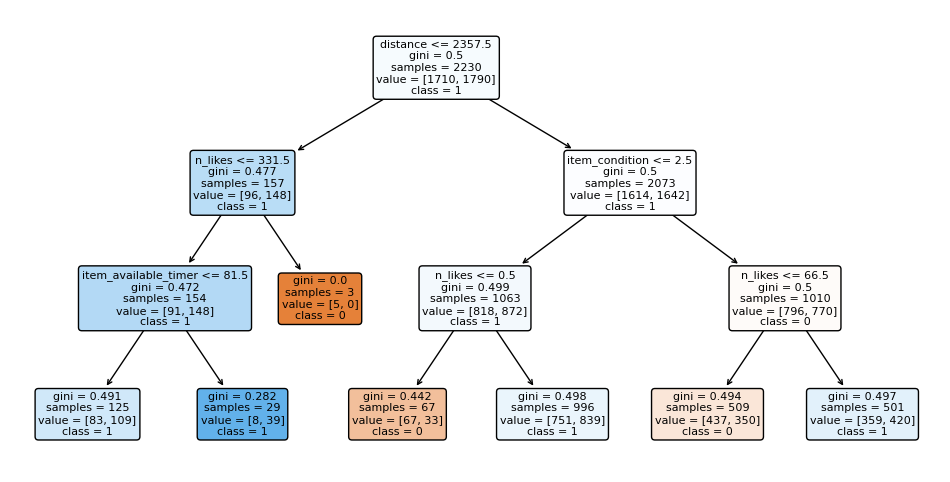

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=391938071)


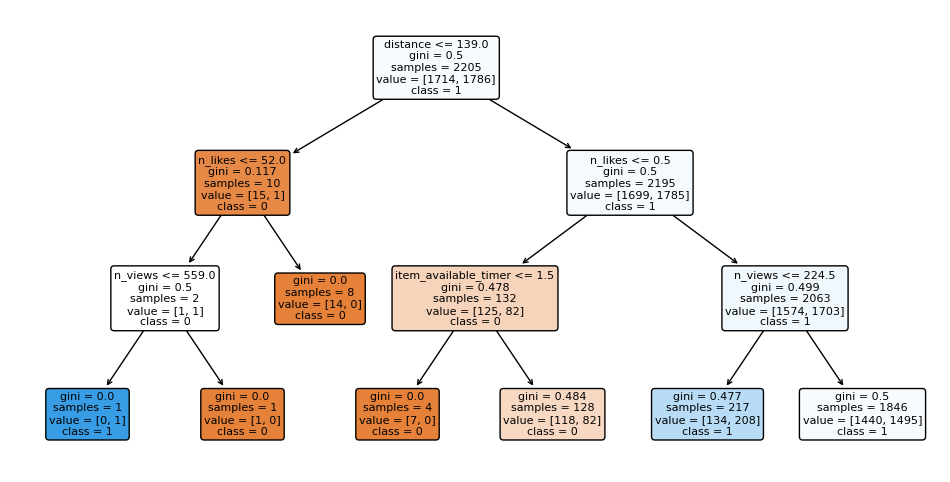

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=2088469036)


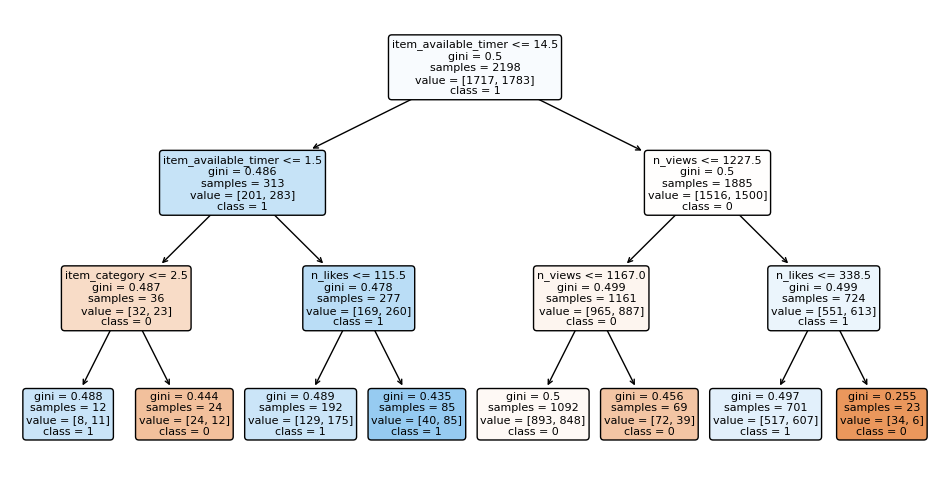

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=344237152)


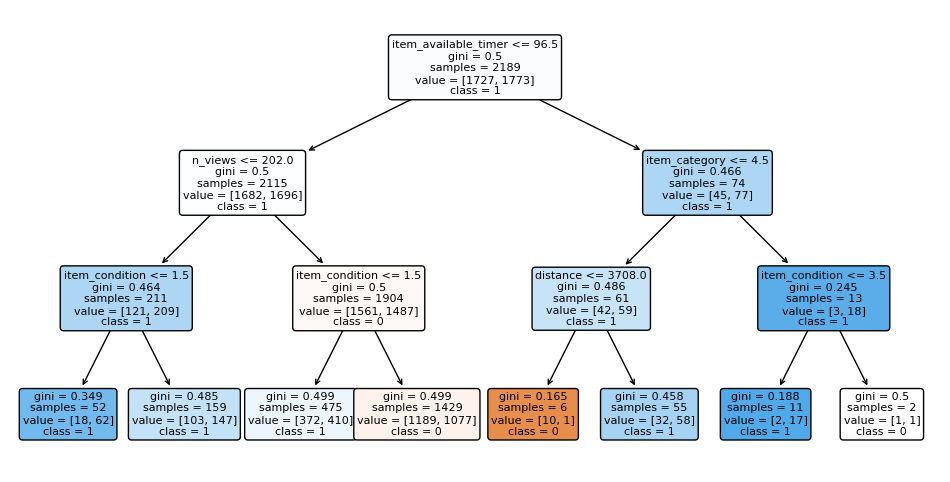

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=477696683)


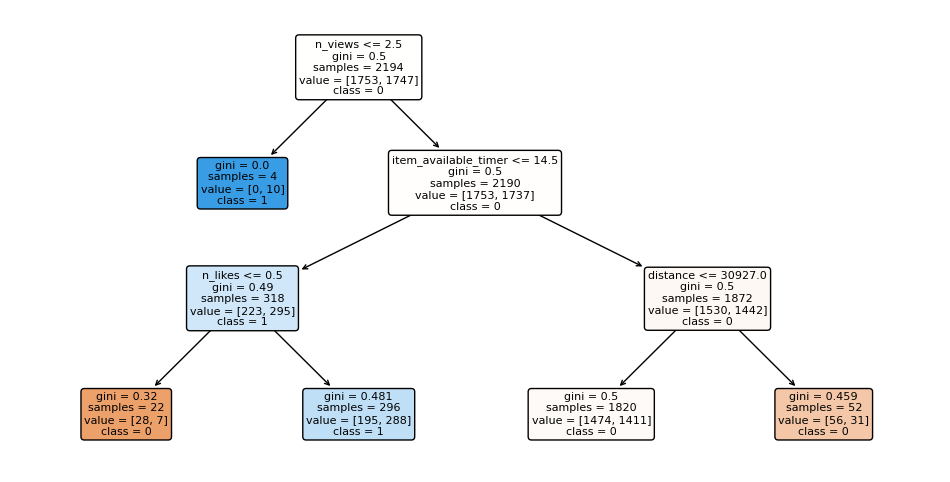

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=351056927)


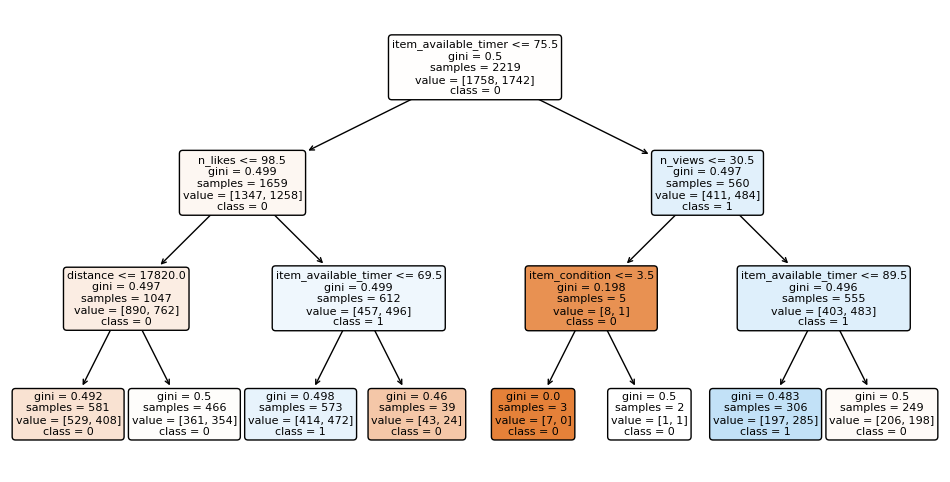

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=662983188)


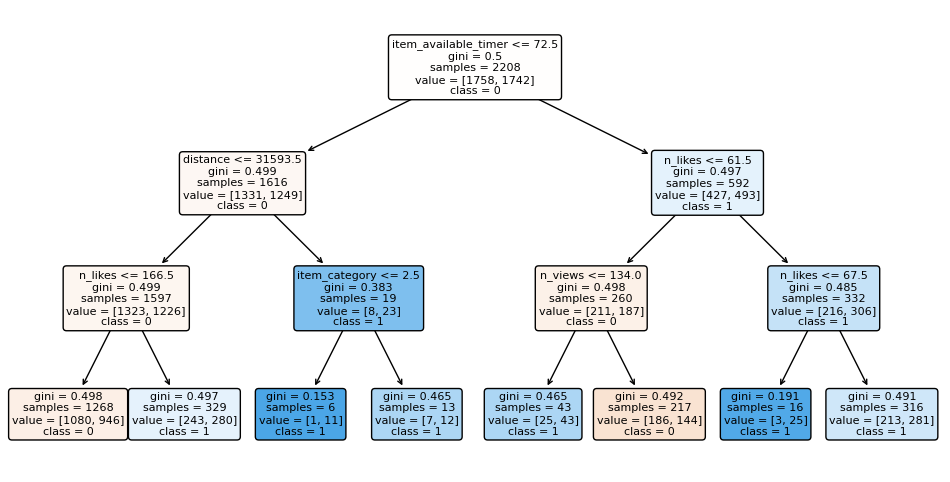

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=562811219)


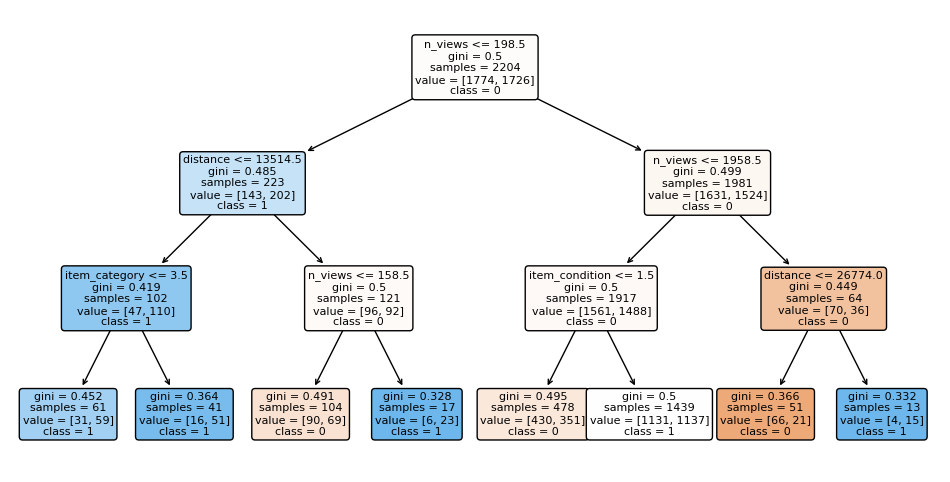

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=919418977)


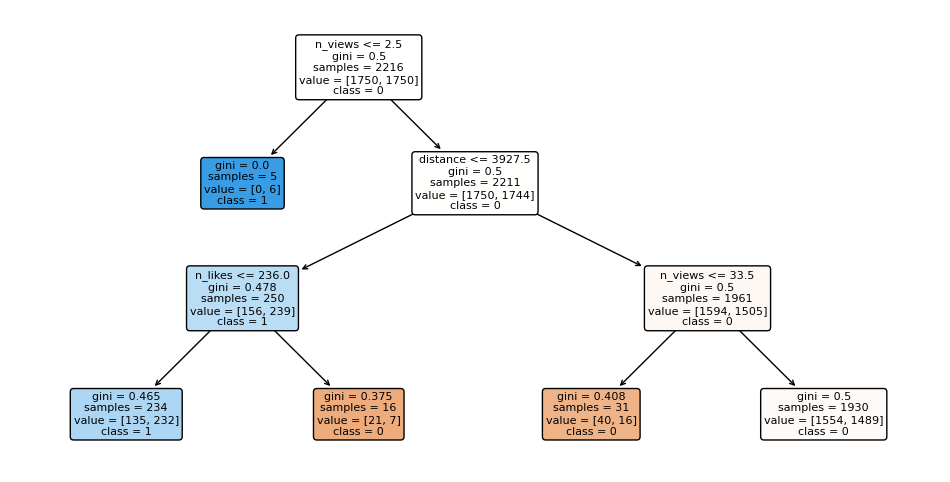

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1484926830)


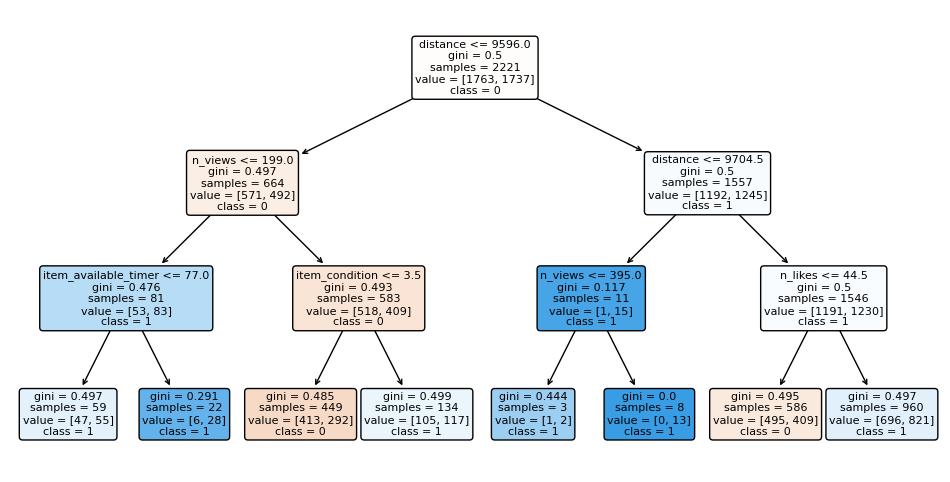

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1512455845)


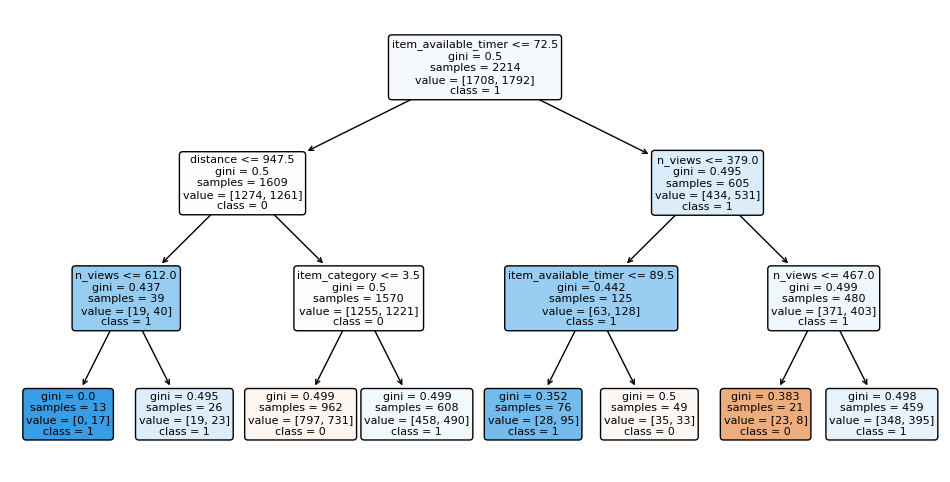

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=287015141)


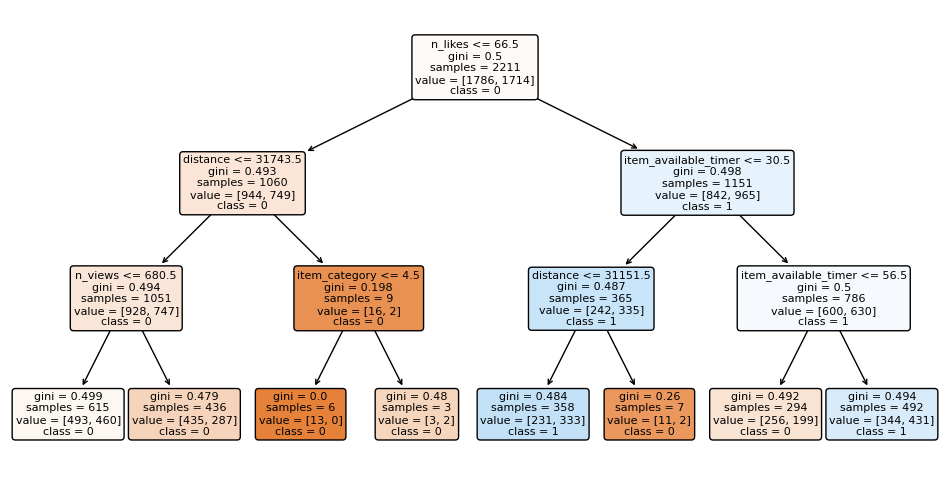

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=2119836249)


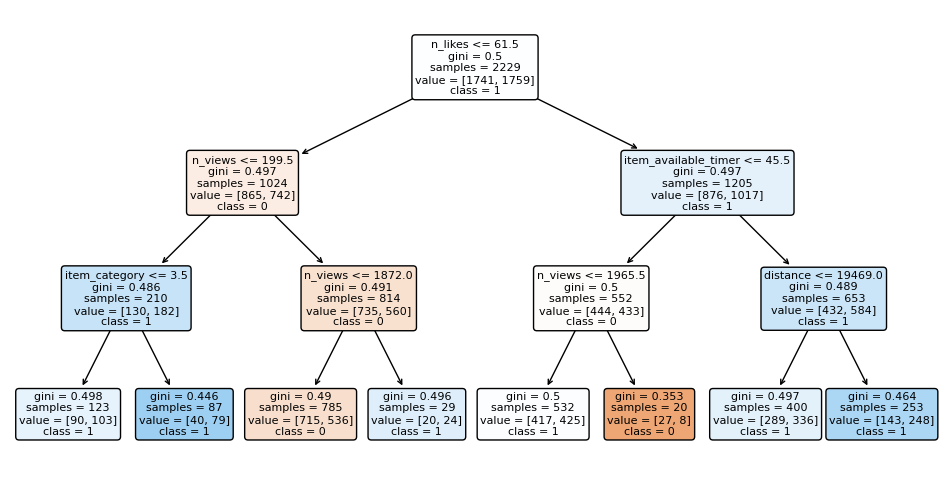

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=578058444)


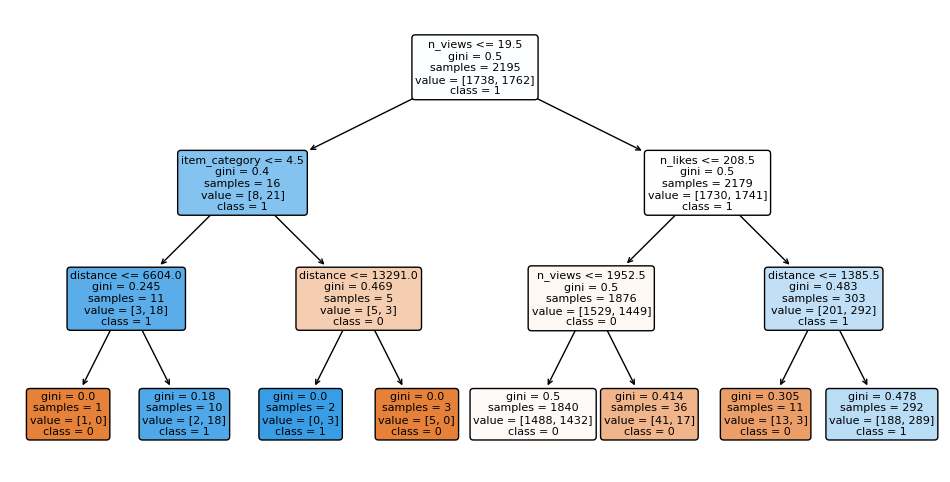

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1536720580)


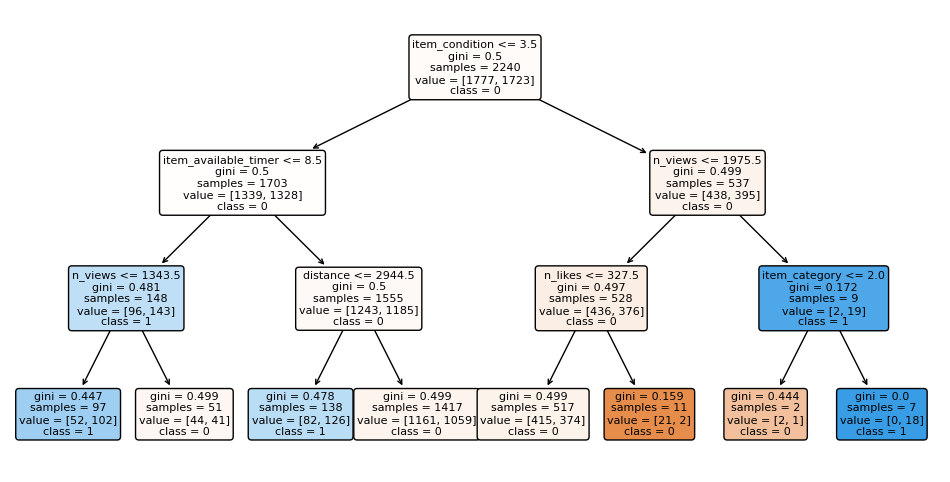

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=334933464)


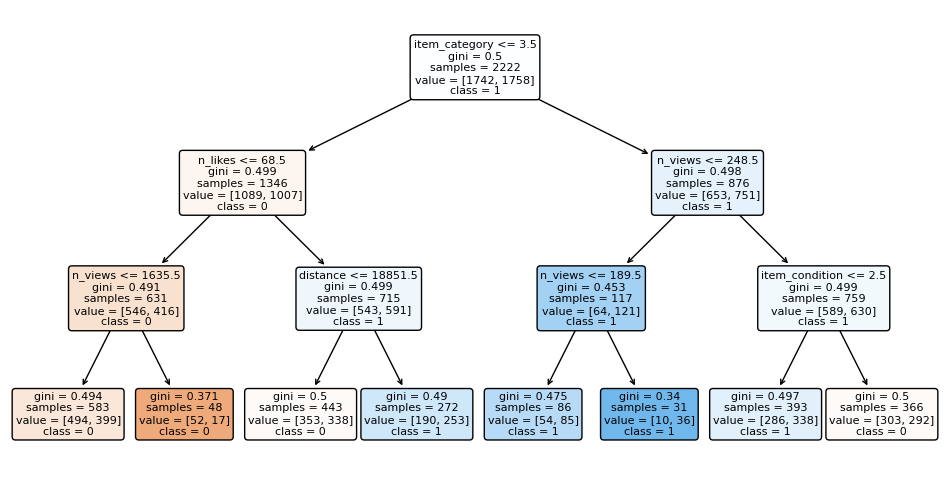

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1953115994)


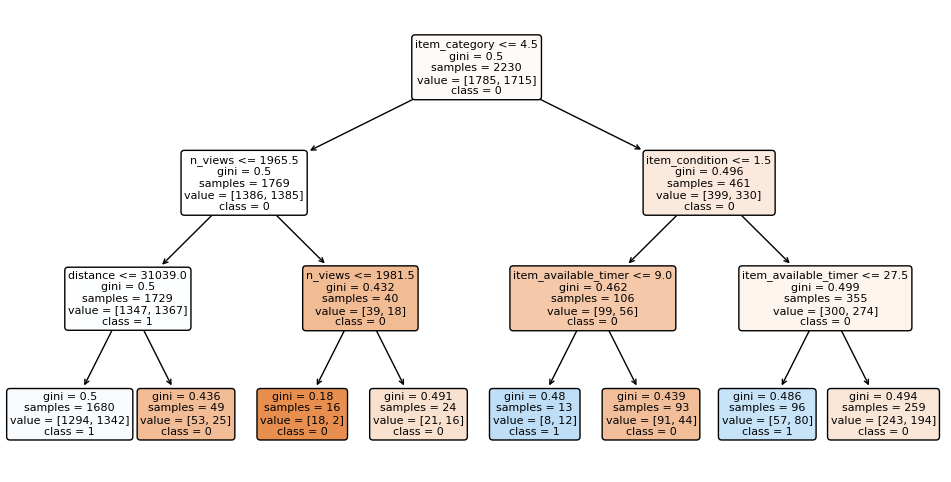

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=469613038)


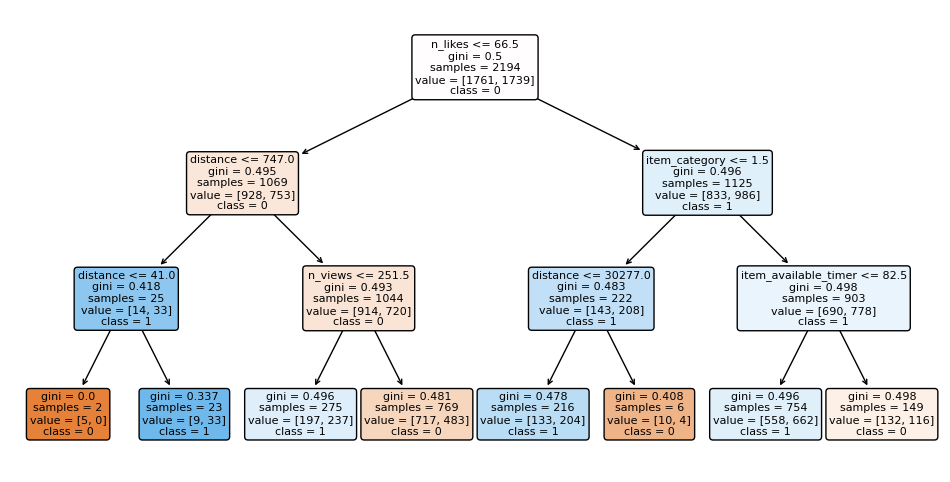

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1006629035)


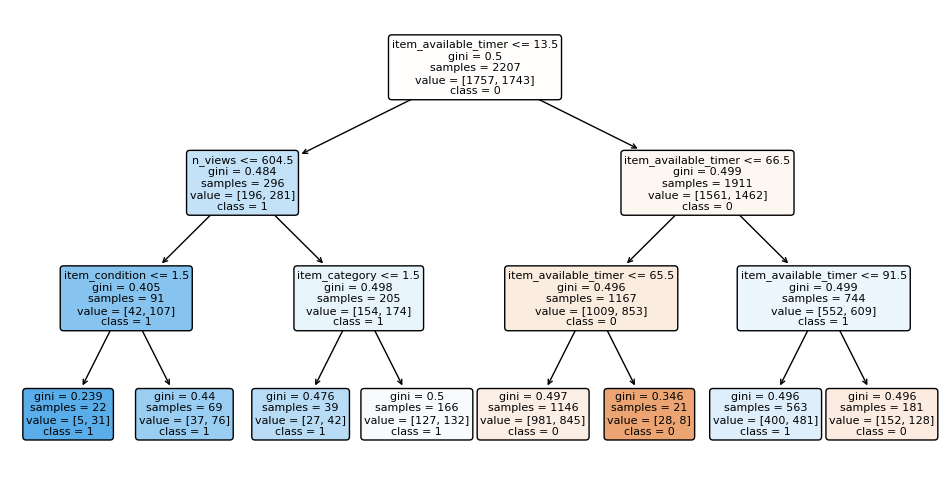

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1046060762)


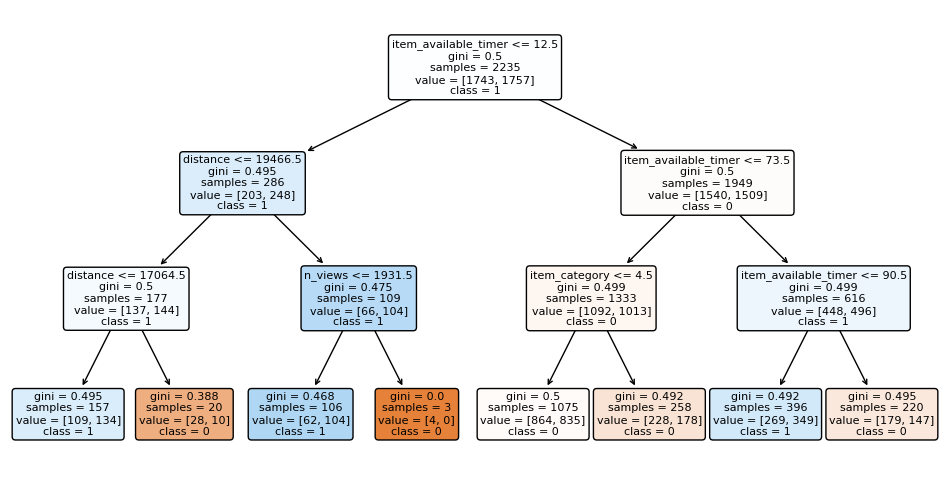

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=2037571372)


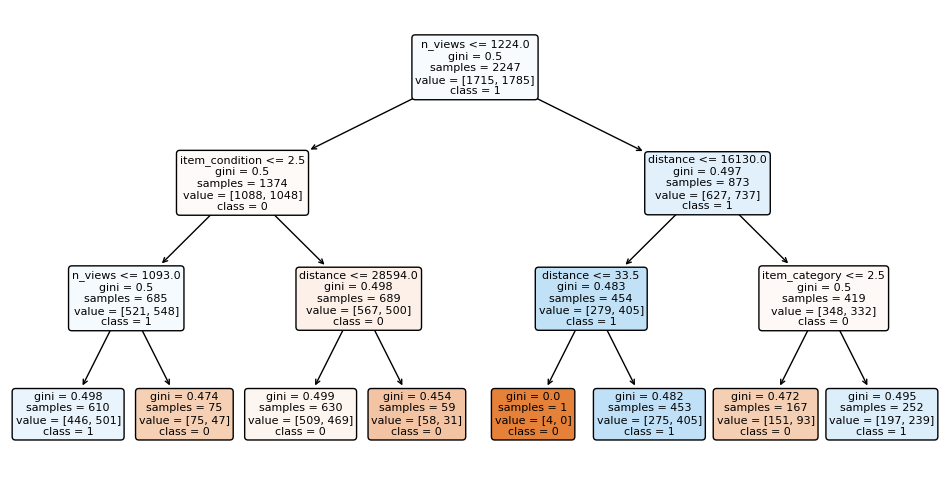

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=93563429)


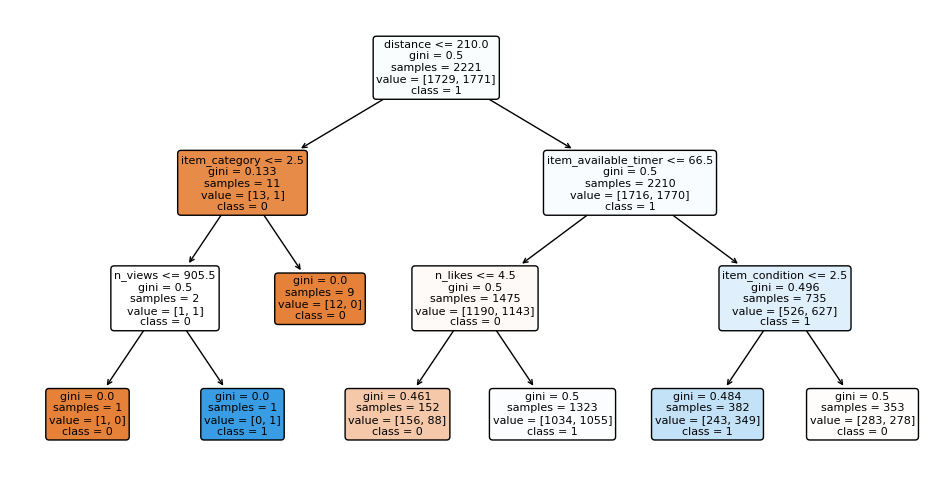

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1764705156)


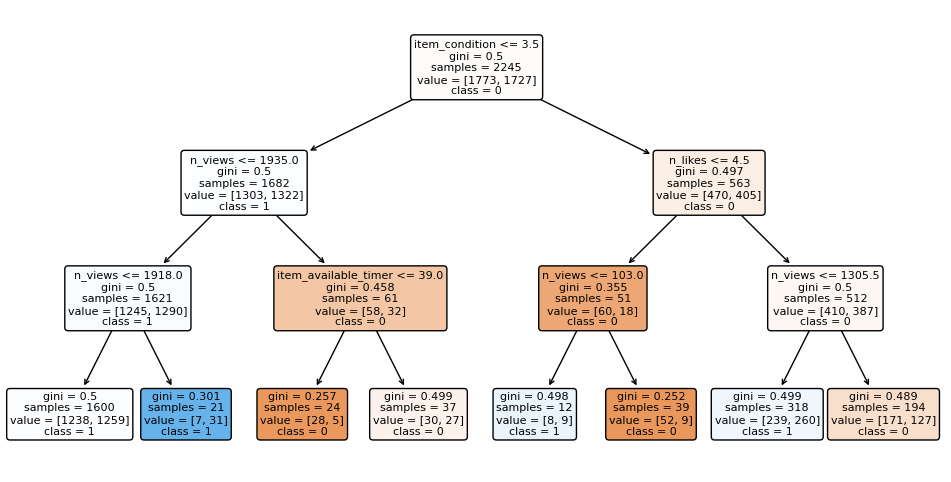

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=961109027)


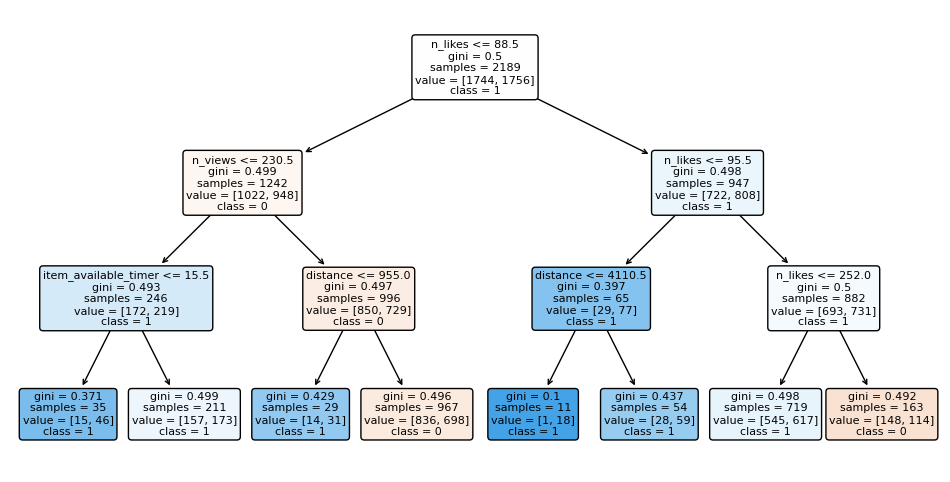

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1550694564)


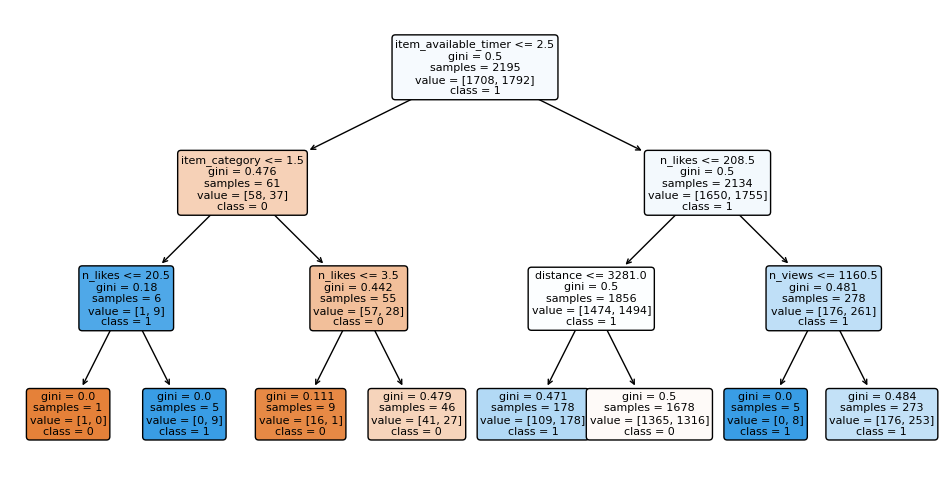

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=982963290)


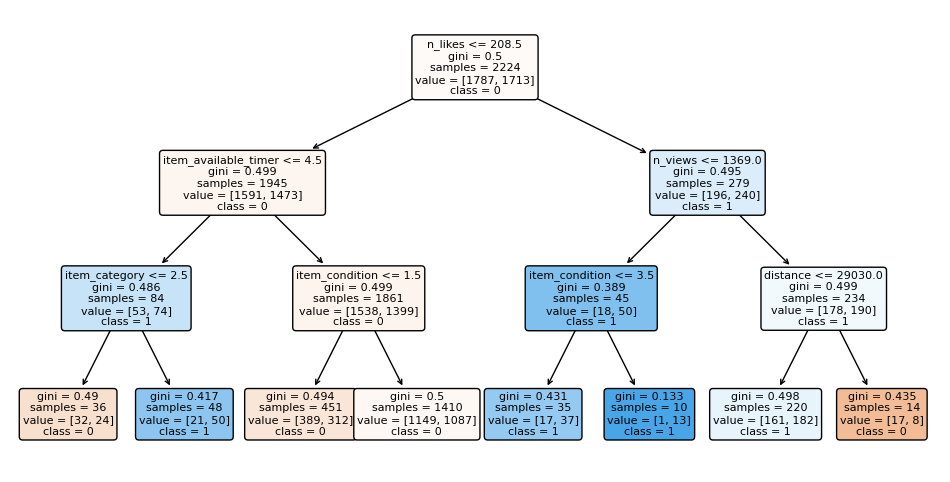

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1249502088)


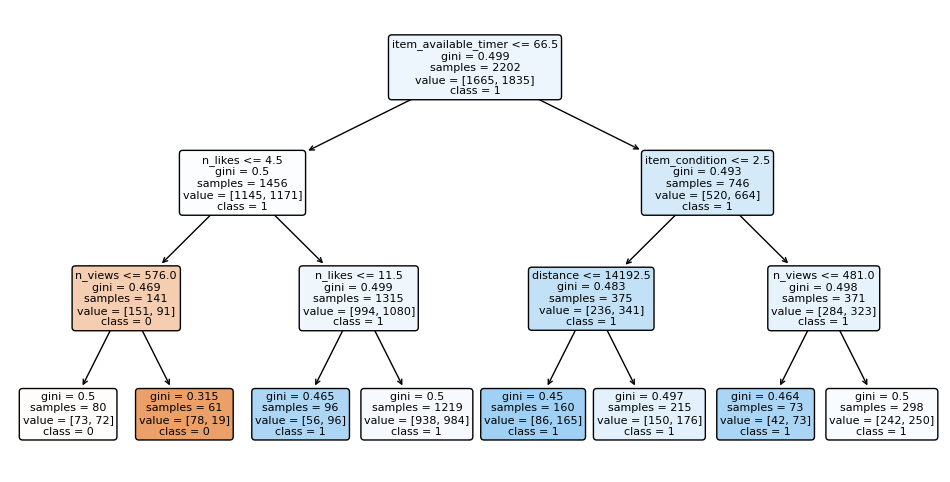

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1120501215)


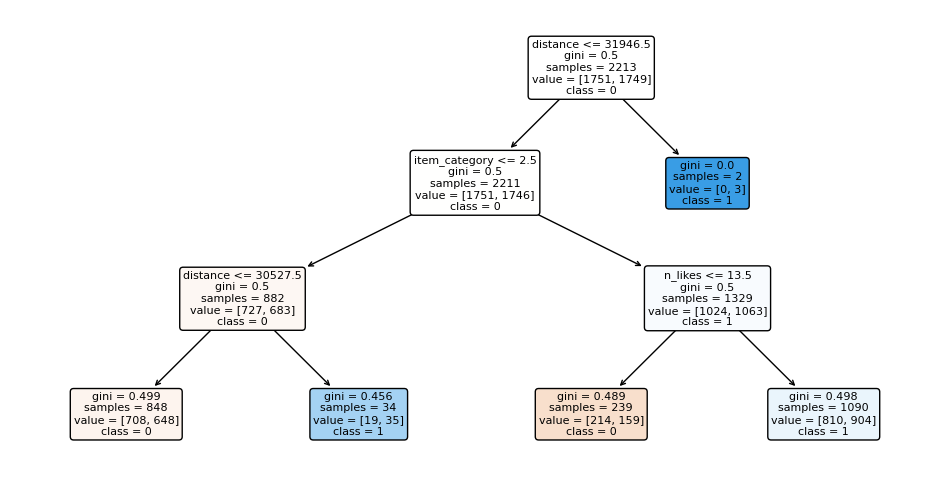

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=165650784)


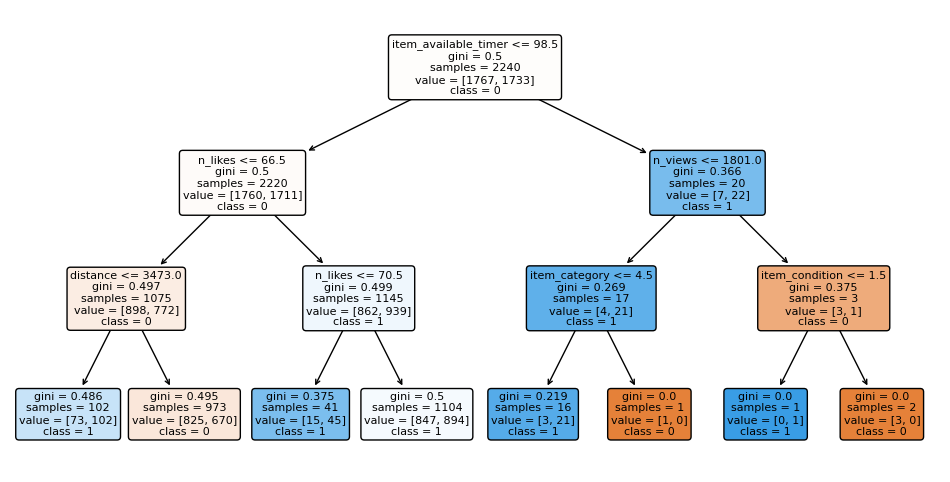

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1394280036)


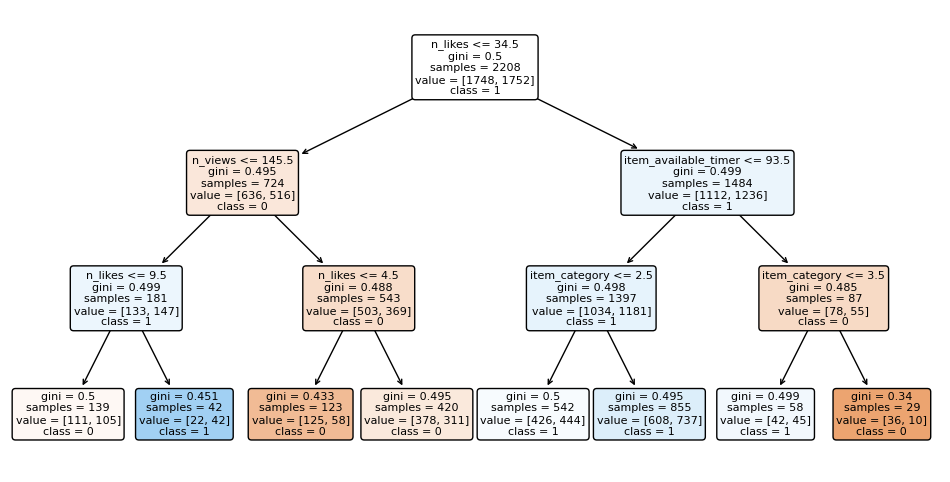

In [59]:
# plot the tree
features = X.columns.values # The name of each column
classes = ['0', '1'] # The name of each class
# You can also use low, medium and high risks in the same order instead
# classes = ['no', 'yes']

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8, 
                   filled=True, 
                   rounded=True)
    plt.show()

In [60]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1score:', f1_score(y_test, y_pred))
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
 


Accuracy: 0.49466666666666664
F1score: 0.5196451204055766
Precision:  0.48867699642431467
Recall:  0.5548037889039242


### Other iterations

In [61]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [62]:
rfc = RandomForestClassifier(n_estimators=10, 
                             max_depth=1)
#                              ,
#                              random_state=SEED)

In [63]:
# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

In [64]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1score:', f1_score(y_test, y_pred))

Accuracy: 0.4693333333333333
F1score: 0.5239234449760766


In [65]:
SEED=100
def rfc(test_size,n_estimators,max_depth):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    rfc = RandomForestClassifier(n_estimators=n_estimators, 
                             max_depth=max_depth,
                             random_state=SEED)
    # Fit RandomForestClassifier
    rfc.fit(X_train, y_train)
    # Predict the test set labels
    y_pred = rfc.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('F1score:', f1_score(y_test, y_pred))
    print('Precision: ',precision_score(y_test, y_pred))
    print('Recall: ',recall_score(y_test, y_pred))
    
    

In [66]:
rfc(.2,2,3)

Accuracy: 0.499
F1score: 0.4234752589182969
Precision:  0.5096952908587258
Recall:  0.36220472440944884


In [67]:
rfc(.3,80,5) 

Accuracy: 0.48733333333333334
F1score: 0.49240924092409244
Precision:  0.4856770833333333
Recall:  0.499330655957162


In [68]:
rfc(.3,3,7)

Accuracy: 0.498
F1score: 0.49699398797595196
Precision:  0.48947368421052634
Recall:  0.5047489823609227


In [69]:
rfc(.2,50,7)

Accuracy: 0.498
F1score: 0.5173076923076922
Precision:  0.4899817850637523
Recall:  0.5478615071283096


In [70]:
rfc(.2,95,9)

Accuracy: 0.505
F1score: 0.46945337620578775
Precision:  0.5214285714285715
Recall:  0.4269005847953216


### Tuning hyperparameters

In [73]:
from sklearn.model_selection import RandomizedSearchCV as RSCV

param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

model = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(X_train, y_train)
model = model.best_estimator_

In [74]:
model

RandomForestClassifier(max_depth=5, max_features=0.5, max_samples=0.3,
                       n_estimators=80)

In [75]:
model.fit(X, y)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print(indices)
print(item_data.columns[indices])

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]): # X.shape[1] is the number of columns
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
print('Accuracy:', accuracy_score(y_test,ç))
print('F1score:', f1_score(y_test, y_pred))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
    


[3 4 5 2 0 1]
Index(['distance', 'n_views', 'n_likes', 'item_available_timer',
       'item_category', 'item_condition'],
      dtype='object')
Feature ranking:
1. feature 3 (0.263915)
2. feature 4 (0.233470)
3. feature 5 (0.211402)
4. feature 2 (0.193457)
5. feature 0 (0.054607)
6. feature 1 (0.043148)
Accuracy: 0.4693333333333333
F1score: 0.5239234449760766
Precision:  0.4634920634920635
Recall:  0.6024759284731774


The tuned model had the higher F1score and Recall.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print(conf_mat)

In [ ]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#### References:
- https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/
- https://towardsdatascience.com/random-forest-classification-678e551462f5
- https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/?
- https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597
- https://postal-codes.cybo.com/germany/berlin/
- https://towardsdatascience.com/mastering-random-forests-a-comprehensive-guide-51307c129cb1
- https://github.com/KC2016/developing_tech_skills/blob/main/DataScience_WWCode/Intro_to_MachineLearning/2_Classification_Bayes.ipynb

In [ ]:
#     param_grid = {'n_estimators':np.arange(50,200,15),
#                 'max_features':np.arange(0.1, 1, 0.1),
#                 'max_depth': [3, 5, 7, 9],
#                 'max_samples': [0.3, 0.5, 0.8]}

#     model = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(X_train, y_train)
#     model = model.best_estimator_
#     model.fit(X, y)
#     importances = model.feature_importances_
#     std = np.std([tree.feature_importances_ for tree in model.estimators_],
#              axis=0)
#     indices = np.argsort(importances)[::-1]

#     print(indices)
#     print(item_data.columns[indices])

#     # Print the feature ranking
#     print("Feature ranking:")

#     for f in range(X.shape[1]): # X.shape[1] is the number of columns
#         print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
#     print('Accuracy:', accuracy_score(y_test, y_pred))
#     print('F1score:', f1_score(y_test, y_pred))
#     print('Precision: ',precision_score(y_test, y_pred))
#     print('Recall: ',recall_score(y_test, y_pred))